In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [59]:
df=pd.read_csv("train.csv")

In [60]:
#df.head()

In [61]:
#df.describe()

In [62]:
#print(df["killPoints"].mean())
#print(df["winPoints"].mean())
#print(df["rankPoints"].mean())

In [63]:
#df.isna().sum()

In [64]:
df.drop(axis="rows",labels=df.index[df["winPlacePerc"].isna()],inplace=True)

In [65]:
#df.isna().sum()

In [66]:
#df

In [67]:
#df.loc[df.rankPoints>-1]

In [68]:
df.loc[df["rankPoints"]==-1,"rankPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["killPoints"]==0)),"killPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["winPoints"]==0)),"winPoints"]=np.nan

In [69]:
#df.isna().sum()

In [70]:
#print(df["killPoints"].mean())
#print(df["winPoints"].mean())
#print(df["rankPoints"].mean())

In [71]:
df.loc[df["killPoints"].isna(),"killPoints"]=df["killPoints"].mean()
df.loc[df["winPoints"].isna(),"winPoints"]=df["winPoints"].mean()
df.loc[df["rankPoints"].isna(),"rankPoints"]=df["rankPoints"].mean()

In [72]:
#testdf=df

In [73]:
#df.nunique()

In [74]:
#df["matchType"].unique()

In [ ]:
lbl_encodr=LabelEncoder()

In [75]:
col_ohenc=["matchType"]
df=pd.get_dummies(df,columns=col_ohenc)
#df.head()

In [76]:
new_type=lbl_encodr.fit_transform(df["groupId"])
#new_type

In [77]:
df["groupId"]=new_type
#df.head()

In [78]:
new_type=lbl_encodr.fit_transform(df["matchId"])
df["matchId"]=new_type
#df.head()

In [79]:
new_type=lbl_encodr.fit_transform(df["Id"])
df["Id"]=new_type
#df.head()

In [80]:
#df.index[df.duplicated()]

In [81]:
#df.columns

In [82]:
matchtypes=df.filter(regex='^matchType',axis=1).columns
#matchtypes

In [83]:
catcols = matchtypes.to_list()
for i in ["Id","groupId","matchId"]:
        catcols.append(i)
dfnum=df.drop(axis="columns",labels=catcols)
dfnum.drop(axis="columns",labels="winPlacePerc",inplace=True)

In [84]:
#sns.set(rc={'figure.figsize':(6,5)})

In [85]:
#for i in dfnum.columns:
#    plt.hist(df[i],bins=500)
#    print(i)
#    plt.show()

In [86]:
#plt.hist(np.power(testdf["matchDuration"],2),bins=500)
#plt.show()

In [87]:
#testdf_cont=testdfnum.drop(axis="columns",labels=["matchDuration","winPlacePerc"])
#for i in testdf_cont.columns:
#    plt.hist(np.power(testdf_cont[i],1/2.05),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_cont[i],1/2.05)

In [88]:
#testdf_new=pd.DataFrame()
#testdf_new["damageDealt"]=testdf["damageDealt"]
#testdf_new["walkDistance"]=testdf["walkDistance"]
#testdf_new["weaponsAcquired"]=testdf["weaponsAcquired"]

In [89]:
#testdf_new

In [90]:
#for i in testdf_new.columns:
#    plt.hist(np.power(testdf_new[i],1/2),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_new[i],1/2)

In [91]:
#testdf["matchDuration"]=np.power(testdf["matchDuration"],2)

#for i in testdf_cont.columns:
#    testdf[i]=testdf_cont[i]

#for i in testdf_new.columns:
#    testdf[i]=testdf_new[i]

#testdf

In [92]:
class Standardizer():
    def __init__(self,meu,stdv):
        self.meu=meu
        self.stdv=stdv

    def scale(self,x):
        return (x - self.meu)/(self.stdv)

In [93]:
#for i in dfnum.columns:
    #sns.boxplot(x=dfnum[i])
#    sns.scatterplot(x=df[i],y=df["winPlacePerc"])
#    print(i)
#    plt.show()

In [94]:
#sns.scatterplot(x=testdf.loc[testdf["assists"]<13.7,"assists"],y=testdf["winPlacePerc"])
#plt.show()
df=df.loc[df["assists"]<13.7]

In [95]:
#sns.scatterplot(x=df.loc[((-df["boosts"]+12*df["winPlacePerc"])>-9),"boosts"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((-df["boosts"]+12*df["winPlacePerc"])>-9)]

In [96]:
#sns.scatterplot(x=df.loc[((-df["damageDealt"]+2300*df["winPlacePerc"]>-1900)),"damageDealt"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((-df["damageDealt"]+1750*df["winPlacePerc"]>-1750))]

In [97]:
#sns.scatterplot(x=df.loc[((20*df["winPlacePerc"]-df["DBNOs"]>-25)&(df["DBNOs"]<35)),"DBNOs"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((20*df["winPlacePerc"]-df["DBNOs"]>-25)&(df["DBNOs"]<35))]

In [98]:
#sns.scatterplot(x=df.loc[(-df["headshotKills"]+10.5*df["winPlacePerc"]>-7.5),"headshotKills"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[(-df["headshotKills"]+10.5*df["winPlacePerc"]>-7.5)]

In [99]:
#sns.scatterplot(x=testdf.loc[testdf["heals"]<52.5,"heals"],y=testdf["winPlacePerc"])
#plt.show()
df=df.loc[df["heals"]<52.5]

In [100]:
#sns.scatterplot(x=df.loc[df["kills"]<44.5,"kills"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[df["kills"]<44.5]

In [101]:
#sns.scatterplot(x=df.loc[(7*df["killPlace"]+400*df["winPlacePerc"]<780),"killPlace"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[(7*df["killPlace"]+400*df["winPlacePerc"]<780)]

In [102]:
#sns.scatterplot(x=df.loc[((df["killPoints"]>750)|(df["winPlacePerc"]<0.42)),"killPoints"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((df["killPoints"]>750)|(df["winPlacePerc"]<0.42))]

In [103]:
#sns.scatterplot(x=df.loc[((df["longestKill"]<1075)&((df["longestKill"]<600)|(df["winPlacePerc"]>0.5))),"longestKill"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((df["longestKill"]<1075)&((df["longestKill"]<600)|(df["winPlacePerc"]>0.5)))]

In [104]:
#sns.scatterplot(x=df.loc[df["revives"]<22.5,"revives"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[df["revives"]<22.5]

In [105]:
#sns.scatterplot(x=df.loc[((df["rankPoints"]<4200)|(df["winPlacePerc"]>0.88)),"rankPoints"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((df["rankPoints"]<4200)|(df["winPlacePerc"]>0.88))]

In [106]:
#sns.scatterplot(x=df.loc[-df["rideDistance"]+22000*df["winPlacePerc"]>-13000,"rideDistance"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[-df["rideDistance"]+22000*df["winPlacePerc"]>-13000]

In [107]:
#sns.scatterplot(x=df.loc[-df["swimDistance"]+975*df["winPlacePerc"]>-525,"swimDistance"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[-df["swimDistance"]+975*df["winPlacePerc"]>-525]

In [108]:
#sns.scatterplot(x=df.loc[df["teamKills"]<8.5,"teamKills"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[df["teamKills"]<8.5]

In [109]:
#sns.scatterplot(x=df.loc[(-df["walkDistance"]+10000*df["winPlacePerc"]>-5000),"walkDistance"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[(-df["walkDistance"]+10000*df["winPlacePerc"]>-5000)]

In [110]:
#sns.scatterplot(x=df.loc[df["weaponsAcquired"]<80,"weaponsAcquired"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[df["weaponsAcquired"]<80]

In [111]:
#sns.scatterplot(x=df.loc[((df["winPoints"]>1100)|(df["winPlacePerc"]<0.32)),"winPoints"],y=df["winPlacePerc"])
#plt.show()
df=df.loc[((df["winPoints"]>1100)|(df["winPlacePerc"]<0.32))]

In [112]:
for i in dfnum.columns:
    normcol=df[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    df[i]=scaledcol    

In [114]:
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore",category=UserWarning)

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
trn_df=df.drop(axis="columns",labels="winPlacePerc")
target=df["winPlacePerc"]

reg = lgb.LGBMRegressor(boosting_type="rf",
                         num_leaves=165,
                         colsample_bytree=.5,
                         min_child_samples=10,
                         min_child_weight=5,
                         n_estimators=400,
                         subsample=.632, # Standard RF bagging fraction
                         subsample_freq=1,
                         min_split_gain=0,
                         reg_alpha=10, # Hard L1 regularization
                         reg_lambda=0,
                         n_jobs=12)

In [ ]:
[f for f in trn_df.columns if f in catcols]

['Id',
 'groupId',
 'matchId',
 'matchType_crashfpp',
 'matchType_crashtpp',
 'matchType_duo',
 'matchType_duo-fpp',
 'matchType_flarefpp',
 'matchType_flaretpp',
 'matchType_normal-duo',
 'matchType_normal-duo-fpp',
 'matchType_normal-solo',
 'matchType_normal-solo-fpp',
 'matchType_normal-squad',
 'matchType_normal-squad-fpp',
 'matchType_solo',
 'matchType_solo-fpp',
 'matchType_squad',
 'matchType_squad-fpp']

In [ ]:
import time
import matplotlib as mpl
#from sklearn.model_selection import StratifiedKFold
#imp_l1 = pd.DataFrame()
#imp_l1["feature"] = trn_df.columns

#folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
#oof_1 = np.zeros(len(trn_df))
#start = time.time()
#for fold_, (trn_idx, val_idx) in enumerate(folds.split(trn_df.values, target.values)):
reg.fit(
    trn_df.values, target.values,
    feature_name=list(trn_df.columns),
    categorical_feature=catcols,
)


LGBMRegressor(boosting_type='rf', colsample_bytree=0.5, min_child_samples=10,
              min_child_weight=5, min_split_gain=0, n_estimators=400, n_jobs=12,
              num_leaves=165, reg_alpha=10, reg_lambda=0, subsample=0.632,
              subsample_freq=1)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

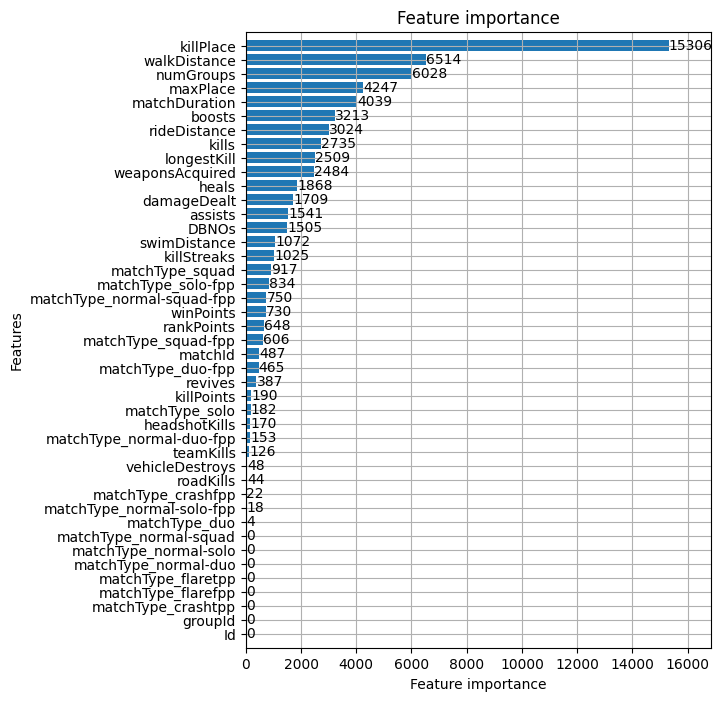

In [ ]:
lgb.plot_importance(reg,figsize=(6,8),height=0.8,ignore_zero=False)

In [ ]:
df.drop(axis="columns",labels=["Id","groupId","matchType_crashtpp","matchType_flaretpp","matchType_flarefpp","matchType_normal-duo","matchType_normal-squad","matchType_normal-solo-fpp","matchType_crashfpp","roadKills","vehicleDestroys","teamKills","matchType_normal-duo-fpp","headshotKills","matchType_solo","killPoints","revives","matchType_duo-fpp","matchId","matchType_squad-fpp","rankPoints","winPoints"],inplace=True)

In [ ]:
testdf=pd.read_csv("test.csv")
#mockdf=pd.read_csv("mocksubmission.csv")

In [ ]:
testdf.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,a5e44e9ccbd861,d59db3787770f1,673b10e9fb9569,0,0,0.0,0,0,0,84,...,-1,0,0.0,0,0.000,0,0,11.92,0,1516
1,ec09f9f5c29d75,fa6c32fa872ffb,f4962a6445499b,4,4,637.2,2,1,1,6,...,1478,1,0.0,0,6.755,0,0,3547.00,3,0
2,fe603d927d7792,96a01db6216403,f6c6ca38bd0452,0,0,0.0,0,0,0,74,...,-1,0,0.0,0,0.000,0,0,558.60,2,1492
3,f7aa0b9da441b1,18f0ea9d617675,0ef5e1ef794417,0,8,830.8,5,0,1,1,...,1531,0,0.0,0,0.000,0,0,3443.00,6,0
4,bcd3f9cb689f6c,6d0a87eb28a92f,42abdc80c2f13b,0,0,0.0,0,0,0,75,...,1489,1,0.0,0,0.000,0,0,107.50,1,0


In [ ]:
testdf.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,...,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06,1.334090e+06
mean,2.335607e-01,1.104922e+00,1.305197e+02,6.557609e-01,2.266706e-01,1.368665e+00,4.763966e+01,5.049926e+02,9.237038e-01,5.433711e-01,...,8.918977e+02,1.642873e-01,6.042083e+02,3.475028e-03,4.458578e+00,2.400663e-02,7.940993e-03,1.152637e+03,3.656769e+00,6.064880e+02
std,5.880474e-01,1.714592e+00,1.708329e+02,1.143485e+00,6.010298e-01,2.681799e+00,2.746317e+01,6.274200e+02,1.557668e+00,7.104985e-01,...,7.366239e+02,4.724911e-01,1.493394e+03,7.217662e-02,3.025125e+01,1.678188e-01,9.250435e-02,1.183499e+03,2.450128e+00,7.396696e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.546000e+02,2.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.830000e+02,3.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.854000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,1.500000e+03,0.000000e+00,5.110000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.972000e+03,5.000000e+00,1.495000e+03
max,2.100000e+01,2.400000e+01,5.479000e+03,3.900000e+01,4.600000e+01,7.300000e+01,1.010000e+02,2.156000e+03,5.600000e+01,1.200000e+01,...,5.910000e+03,3.200000e+01,3.129000e+04,1.100000e+01,3.823000e+03,1.200000e+01,4.000000e+00,1.513000e+04,1.020000e+02,2.013000e+03


In [ ]:
testdf.loc[testdf["rankPoints"]==-1,"rankPoints"]=np.nan
testdf.loc[((testdf["rankPoints"]!=-1) & (testdf["killPoints"]==0)),"killPoints"]=np.nan
testdf.loc[((testdf["rankPoints"]!=-1) & (testdf["winPoints"]==0)),"winPoints"]=np.nan

In [ ]:
#mockdf.loc[mockdf["rankPoints"]==-1,"rankPoints"]=np.nan
#mockdf.loc[((mockdf["rankPoints"]!=-1) & (mockdf["killPoints"]==0)),"killPoints"]=np.nan
#mockdf.loc[((mockdf["rankPoints"]!=-1) & (mockdf["winPoints"]==0)),"winPoints"]=np.nan

In [ ]:
testdf.loc[testdf["killPoints"].isna(),"killPoints"]=testdf["killPoints"].mean()
testdf.loc[testdf["winPoints"].isna(),"winPoints"]=testdf["winPoints"].mean()
testdf.loc[testdf["rankPoints"].isna(),"rankPoints"]=testdf["rankPoints"].mean()

In [ ]:
idlist=testdf["Id"]

In [ ]:
#mockdf.loc[mockdf["killPoints"].isna(),"killPoints"]=mockdf["killPoints"].mean()
#mockdf.loc[mockdf["winPoints"].isna(),"winPoints"]=mockdf["winPoints"].mean()
#mockdf.loc[mockdf["rankPoints"].isna(),"rankPoints"]=mockdf["rankPoints"].mean()

In [ ]:
#new_type=lbl_encodr.fit_transform(testdf["groupId"])
#testdf["groupId"]=new_type

In [ ]:
#new_type=lbl_encodr.fit_transform(testdf["matchType"])
#testdf["matchType"]=new_type

In [ ]:
#new_type=lbl_encodr.fit_transform(mockdf["groupId"])
#mockdf["groupId"]=new_type

In [ ]:
#new_type=lbl_encodr.fit_transform(mockdf["MatchType"])
#mockdf["MatchType"]=new_type

In [ ]:
col_ohenc=["matchType"]
testdf=pd.get_dummies(testdf,columns=col_ohenc)

In [ ]:
testdfnum=testdf.drop(axis="columns",labels=catcols)
for i in testdfnum.columns:
    normcol=testdf[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    testdf[i]=scaledcol  

In [ ]:
#mockdf.drop(axis="columns",labels=["damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
#mockdf.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)
#mockdf.drop(axis="columns",labels=["matchId","Id"],inplace=True)

In [ ]:
#mockdfnum=testdf.drop(axis="columns",labels=["groupId","matchType"])
#for i in mockdfnum.columns:
#    normcol=mockdf[i]
#    scaler=Standardizer(normcol.mean(),normcol.std())
#    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
#    mockdf[i]=scaledcol  

In [ ]:
testdf.drop(axis="columns",labels=["Id","groupId","matchType_crashtpp","matchType_flaretpp","matchType_flarefpp","matchType_normal-duo","matchType_normal-squad","matchType_normal-solo-fpp","matchType_crashfpp","roadKills","vehicleDestroys","teamKills","matchType_normal-duo-fpp","headshotKills","matchType_solo","killPoints","revives","matchType_duo-fpp","matchId","matchType_squad-fpp","rankPoints","winPoints"],inplace=True)

In [ ]:
'''from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train=df.drop(axis="columns",labels="winPlacePerc")
Y_train=df["winPlacePerc"]
X_test=testdf

modal=LinearRegression()
lreq=modal.fit(X_train,Y_train)
Y_pred=lreq.predict(X_train)'''

'from sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\nX_train=df.drop(axis="columns",labels="winPlacePerc")\nY_train=df["winPlacePerc"]\nX_test=testdf\n\nmodal=LinearRegression()\nlreq=modal.fit(X_train,Y_train)\nY_pred=lreq.predict(X_train)'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

trn_df=df.drop(axis="columns",labels="winPlacePerc")

reg.fit(
    trn_df.values, target.values,
    feature_name=list(trn_df.columns),
    categorical_feature=[f for f in trn_df.columns if f in catcols],
)

LGBMRegressor(boosting_type='rf', colsample_bytree=0.5, min_child_samples=10,
              min_child_weight=5, min_split_gain=0, n_estimators=400, n_jobs=12,
              num_leaves=165, reg_alpha=10, reg_lambda=0, subsample=0.632,
              subsample_freq=1)

In [ ]:
Y_train=target
Y_pred=reg.predict(trn_df)

In [ ]:
def mse(y,ypred):
    return mean_squared_error(y,ypred)

mse(Y_train,Y_pred)

0.01121881024459243

In [ ]:
Y_test_pred=reg.predict(testdf)
subdb=pd.DataFrame()
subdb["Id"]=idlist
subdb["winPlacePerc"]=Y_test_pred
subdb.to_csv("sub.csv",index=False)